## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import logging
import os

import pandas as pd

import helpers.dbg as dbg
import helpers.printing as prnt

In [2]:
prnt.config_notebook()

# dbg.init_logger(verbosity=logging.DEBUG)
dbg.init_logger(verbosity=logging.INFO)
# dbg.test_logger()
_LOG = logging.getLogger(__name__)

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-26b9c9dd-34a1-43ca-8ac4-d0545f037ca0.json'


# Real-time node

import core.dataflow.real_time as cdrt

In [15]:
import helpers.datetime_ as hdatetime

In [11]:
rrt = cdrt.ReplayRealTime(pd.Timestamp("2021-07-27 9:30:00-04:00"))

rct = rrt.get_replayed_current_time()
print("rct=%s" % rct)

rct=2021-07-27 09:30:00.001762-04:00


In [12]:
rct = rrt.get_replayed_current_time()
print("rct=%s" % rct)

rct=2021-07-27 09:30:02.253789-04:00


In [13]:
rct = rrt.get_replayed_current_time()
print("rct=%s" % rct)

rct=2021-07-27 09:30:03.544795-04:00


In [65]:
current_time = hdatetime.get_current_time(tz="ET")
print(current_time)
current_time = pd.Timestamp(current_time)
print(current_time.round("2S"))
# num_seconds
# aligned_current_time = current_time
# print(current_time)

2021-07-29 10:45:59.153543-05:00
2021-07-29 10:46:00-05:00


In [26]:
rrt = cdrt.ReplayRealTime(
    pd.Timestamp("2021-07-27 9:30:00-04:00"), speed_up_factor=60
)

sleep_interval_in_secs = 1.0
num_iterations = 10
# get_current_time = datetime.datetime.now
# get_current_time = lambda : hdatetime.get_current_time(tz="ET")
get_current_time = rrt.get_replayed_current_time
need_to_execute = cdrt.execute_every_5_minutes

cdrt.execute_dag_with_real_time_loop(
    sleep_interval_in_secs, num_iterations, get_current_time, need_to_execute
)

initial_replayed_dt=2021-07-27 09:30:00-04:00
Using tz 'pytz.FixedOffset(-240)'
now='2021-07-29 10:01:26.344868-04:00'
Using tz 'pytz.FixedOffset(-240)'
now='2021-07-29 10:01:26.347108-04:00'
num_it=1/10: current_time=2021-07-27 09:30:00.002240-04:00
  -> execute
Using tz 'pytz.FixedOffset(-240)'
now='2021-07-29 10:01:27.354432-04:00'
num_it=2/10: current_time=2021-07-27 09:30:01.009564-04:00
  -> execute
Using tz 'pytz.FixedOffset(-240)'
now='2021-07-29 10:01:28.361122-04:00'
num_it=3/10: current_time=2021-07-27 09:30:02.016254-04:00
  -> execute
Using tz 'pytz.FixedOffset(-240)'
now='2021-07-29 10:01:29.367219-04:00'
num_it=4/10: current_time=2021-07-27 09:30:03.022351-04:00
  -> execute
Using tz 'pytz.FixedOffset(-240)'
now='2021-07-29 10:01:30.373800-04:00'
num_it=5/10: current_time=2021-07-27 09:30:04.028932-04:00
  -> execute
Using tz 'pytz.FixedOffset(-240)'
now='2021-07-29 10:01:31.379721-04:00'
num_it=6/10: current_time=2021-07-27 09:30:05.034853-04:00
  -> execute
Using tz 'p

## Test real-time node

In [80]:
start_datetime = pd.Timestamp("2010-01-04 09:30:00")
end_datetime = pd.Timestamp("2010-01-05 09:30:00")
columns = ["close", "volume"]
cdrt.generate_synthetic_data(columns, start_datetime, end_datetime)



,close,volume
2010-01-04 09:30:00,-0.125460,0.450714
2010-01-04 09:31:00,0.106534,0.549373
2010-01-04 09:32:00,-0.237447,0.205367
2010-01-04 09:33:00,-0.679364,0.571543
2010-01-04 09:34:00,-0.578249,0.779616
...,...,...
2010-01-05 09:26:00,-11.079724,7.442534
2010-01-05 09:27:00,-10.799359,7.418870
2010-01-05 09:28:00,-10.801819,7.123550
2010-01-05 09:29:00,-10.710688,6.809686


In [89]:
import core.dataflow.nodes.sources as cdtfns

nid = "rtds"

delay_in_secs = 0.0

start_datetime = pd.Timestamp("2010-01-04 09:30:00", tz=hdatetime.get_ET_tz())
end_datetime = pd.Timestamp("2010-01-05 09:30:00", tz=hdatetime.get_ET_tz())

# Use a replayed real-time starting at the same time as the data.
rrt = cdrt.ReplayRealTime(
    start_datetime
)
get_current_time = rrt.get_replayed_current_time

data_builder = cdrt.generate_synthetic_data
data_builder_kwargs = {
    "columns": ["close", "volume"],
    "start_datetime": start_datetime,
    "end_datetime": end_datetime,
    "seed": 42,
}

columns = ["close", "volume"]
rtds = cdtfns.RealTimeDataSource("rtds", delay_in_secs, get_current_time, data_builder, data_builder_kwargs)

#current_time = pd.Timestamp("2010-01-04 09:35:00")
#rtds.set_current_time(current_time)

rtds.fit()

initial_replayed_dt=2010-01-04 09:30:00-05:00
Using tz 'America/New_York'
now='2021-07-29 18:09:02.017104-04:00'
Using tz 'America/New_York'
now='2021-07-29 18:09:02.021999-04:00'


{'df_out':                              close    volume
 2010-01-04 09:30:00-05:00 -0.12546  0.450714}

In [101]:
rtds.fit()

Using tz 'America/New_York'
now='2021-07-29 18:16:37.505845-04:00'


{'df_out':                               close    volume
 2010-01-04 09:30:00-05:00 -0.125460  0.450714
 2010-01-04 09:31:00-05:00  0.106534  0.549373
 2010-01-04 09:32:00-05:00 -0.237447  0.205367
 2010-01-04 09:33:00-05:00 -0.679364  0.571543
 2010-01-04 09:34:00-05:00 -0.578249  0.779616
 2010-01-04 09:35:00-05:00 -1.057664  1.249526
 2010-01-04 09:36:00-05:00 -0.725222  0.961865
 2010-01-04 09:37:00-05:00 -1.043397  0.645270}

## Build pipeline


In [102]:
import core.config as cconfig
import core.dataflow as cdataf

import core.dataflow.real_time as cdrt
import dataflow_amp.returns.pipeline as darp

dag_builder = darp.ReturnsPipeline()
config = dag_builder.get_config_template()

# # Add the source node.
# source_config = cconfig.get_config_from_nested_dict(
#     {
#         "func": cldns.load_single_instrument_data,
#         "func_kwargs": {
#             "start_date": datetime.date(2010, 6, 29),
#             "end_date": datetime.date(2010, 7, 13),
#         },
#     }
# )
# config["load_prices"] = source_config
# config["resample_prices_to_1min", "func_kwargs", "volume_cols"] = ["volume"]
# config["compute_vwap", "func_kwargs", "rule"] = "15T"
# config["compute_vwap", "func_kwargs", "volume_col"] = "volume"

if False:
    from im.kibot.data.config import S3_PREFIX

    ticker = "AAPL"
    file_path = os.path.join(S3_PREFIX, "pq/sp_500_1min", ticker + ".pq")
    source_node_kwargs = {
        "func": cdataf.load_data_from_disk,
        "func_kwargs": {
            "file_path": file_path,
            "start_date": pd.to_datetime("2010-01-04 9:30:00"),
            "end_date": pd.to_datetime("2010-01-04 16:05:00"),
        },
    }
    config["load_prices"] = cconfig.get_config_from_nested_dict(
        source_node_kwargs
    )

else:
    start_date = pd.Timestamp("2010-01-04 09:30:00")
    end_date = pd.Timestamp("2010-01-04 11:30:00")

    source_node_kwargs = {
        "columns": ["close", "vol"],
        "start_date": start_date,
        "end_date": end_date,
    }
    config["load_prices"] = cconfig.get_config_from_nested_dict(
        {
            "source_node_name": "real_time_synthetic",
            "source_node_kwargs": source_node_kwargs,
        }
    )

print(config)

load_prices:
  source_node_name: real_time_synthetic
  source_node_kwargs:
    columns: ['close', 'vol']
    start_date: 2010-01-04 09:30:00
    end_date: 2010-01-04 11:30:00
filter_weekends:
  col_mode: replace_all
filter_ath:
  col_mode: replace_all
  transformer_kwargs:
    start_time: 09:30:00
    end_time: 16:00:00
resample_prices_to_1min:
  func_kwargs:
    rule: 1T
    price_cols: ['close']
    volume_cols: ['vol']
compute_vwap:
  func_kwargs:
    rule: 5T
    price_col: close
    volume_col: vol
    add_bar_start_timestamps: True
    add_epoch: True
    add_last_price: True
compute_ret_0:
  cols: ['twap', 'vwap']
  col_mode: merge_all
  transformer_kwargs:
    mode: pct_change


In [6]:
dag = dag_builder.get_dag(config)

In [7]:
if False:
    # nid = "compute_ret_0"
    nid = "load_prices"
    node = dag.get_node("load_prices")
    node.reset_current_time()
    node.set_current_time(pd.to_datetime("2010-01-06 9:30:00"))

    dict_ = dag.run_leq_node(nid, "fit")

    print(dict_)

In [8]:
node = dag.get_node("load_prices")
node.reset_current_time()

for now in cdrt.get_now_time(start_date, end_date):
    print("now=", now)
    execute = cdrt.is_dag_to_execute(now)
    if execute:
        print("Time to execute the DAG")
        node = dag.get_node("load_prices")
        node.set_current_time(now)
        #
        sink = dag.get_unique_sink()
        dict_ = dag.run_leq_node(sink, "fit")
        print(dict_["df_out"].tail(3))

now= 2010-01-04 09:30:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                     vwap  twap  last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 09:30:00   NaN   NaN   NaN 2010-01-04 09:25:00  21043290         NaN         NaN
now= 2010-01-04 09:31:00
now= 2010-01-04 09:32:00
now= 2010-01-04 09:33:00
now= 2010-01-04 09:34:00
now= 2010-01-04 09:35:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 09:30:00       NaN       NaN       NaN 2010-01-04 09:25:00  21043290         NaN         NaN
2010-01-04 09:35:00 -0.374573 -0.044406 -0.440136 2010-01-04 09:30:00  21043295         NaN         NaN
now= 2010-01-04 09:36:00
now= 2010-01-04 09:37:00
now= 2010-01-04 09:38:00
now= 2010-01-04 09:39:00
now= 2010-01-04 09:40:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 09:30:00       NaN       NaN       NaN 2010-01-04 09:25:00  21043290         NaN         NaN
2010-01-04 09:35:00 -0.374573 -0.044406 -0.440136 2010-01-04 09:30:00  21043295         NaN         NaN
2010-01-04 09:40:00  0.615320  0.602095  0.875367 2010-01-04 09:35:00  21043300  -14.558811   -2.642724
now= 2010-01-04 09:41:00
now= 2010-01-04 09:42:00
now= 2010-01-04 09:43:00
now= 2010-01-04 09:44:00
now= 2010-01-04 09:45:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 09:35:00 -0.374573 -0.044406 -0.440136 2010-01-04 09:30:00  21043295         NaN         NaN
2010-01-04 09:40:00  0.615320  0.602095  0.875367 2010-01-04 09:35:00  21043300  -14.558811   -2.642724
2010-01-04 09:45:00  1.266179  1.218554  0.763050 2010-01-04 09:40:00  21043305    1.023858    1.057756
now= 2010-01-04 09:46:00
now= 2010-01-04 09:47:00
now= 2010-01-04 09:48:00
now= 2010-01-04 09:49:00
now= 2010-01-04 09:50:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 09:40:00  0.615320  0.602095  0.875367 2010-01-04 09:35:00  21043300  -14.558811   -2.642724
2010-01-04 09:45:00  1.266179  1.218554  0.763050 2010-01-04 09:40:00  21043305    1.023858    1.057756
2010-01-04 09:50:00  0.645475  0.708973  0.367058 2010-01-04 09:45:00  21043310   -0.418185   -0.490218
now= 2010-01-04 09:51:00
now= 2010-01-04 09:52:00
now= 2010-01-04 09:53:00
now= 2010-01-04 09:54:00
now= 2010-01-04 09:55:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 09:45:00  1.266179  1.218554  0.763050 2010-01-04 09:40:00  21043305    1.023858    1.057756
2010-01-04 09:50:00  0.645475  0.708973  0.367058 2010-01-04 09:45:00  21043310   -0.418185   -0.490218
2010-01-04 09:55:00 -0.182449 -0.148399  0.265180 2010-01-04 09:50:00  21043315   -1.209316   -1.282659
now= 2010-01-04 09:56:00
now= 2010-01-04 09:57:00
now= 2010-01-04 09:58:00
now= 2010-01-04 09:59:00
now= 2010-01-04 10:00:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 09:50:00  0.645475  0.708973  0.367058 2010-01-04 09:45:00  21043310   -0.418185   -0.490218
2010-01-04 09:55:00 -0.182449 -0.148399  0.265180 2010-01-04 09:50:00  21043315   -1.209316   -1.282659
2010-01-04 10:00:00  0.531794  0.565052  0.398588 2010-01-04 09:55:00  21043320   -4.807646   -3.914748
now= 2010-01-04 10:01:00
now= 2010-01-04 10:02:00
now= 2010-01-04 10:03:00
now= 2010-01-04 10:04:00
now= 2010-01-04 10:05:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 09:55:00 -0.182449 -0.148399  0.265180 2010-01-04 09:50:00  21043315   -1.209316   -1.282659
2010-01-04 10:00:00  0.531794  0.565052  0.398588 2010-01-04 09:55:00  21043320   -4.807646   -3.914748
2010-01-04 10:05:00  1.000890  1.119034  1.255534 2010-01-04 10:00:00  21043325    0.980409    0.882102
now= 2010-01-04 10:06:00
now= 2010-01-04 10:07:00
now= 2010-01-04 10:08:00
now= 2010-01-04 10:09:00
now= 2010-01-04 10:10:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:00:00  0.531794  0.565052  0.398588 2010-01-04 09:55:00  21043320   -4.807646   -3.914748
2010-01-04 10:05:00  1.000890  1.119034  1.255534 2010-01-04 10:00:00  21043325    0.980409    0.882102
2010-01-04 10:10:00  1.476484  1.470747  2.017089 2010-01-04 10:05:00  21043330    0.314301    0.475170
now= 2010-01-04 10:11:00
now= 2010-01-04 10:12:00
now= 2010-01-04 10:13:00
now= 2010-01-04 10:14:00
now= 2010-01-04 10:15:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:05:00  1.000890  1.119034  1.255534 2010-01-04 10:00:00  21043325    0.980409    0.882102
2010-01-04 10:10:00  1.476484  1.470747  2.017089 2010-01-04 10:05:00  21043330    0.314301    0.475170
2010-01-04 10:15:00  2.508271  2.473891  2.560968 2010-01-04 10:10:00  21043335    0.682065    0.698813
now= 2010-01-04 10:16:00
now= 2010-01-04 10:17:00
now= 2010-01-04 10:18:00
now= 2010-01-04 10:19:00
now= 2010-01-04 10:20:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:10:00  1.476484  1.470747  2.017089 2010-01-04 10:05:00  21043330    0.314301    0.475170
2010-01-04 10:15:00  2.508271  2.473891  2.560968 2010-01-04 10:10:00  21043335    0.682065    0.698813
2010-01-04 10:20:00  1.894548  1.729003  1.361816 2010-01-04 10:15:00  21043340   -0.301100   -0.244680
now= 2010-01-04 10:21:00
now= 2010-01-04 10:22:00
now= 2010-01-04 10:23:00
now= 2010-01-04 10:24:00
now= 2010-01-04 10:25:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:15:00  2.508271  2.473891  2.560968 2010-01-04 10:10:00  21043335    0.682065    0.698813
2010-01-04 10:20:00  1.894548  1.729003  1.361816 2010-01-04 10:15:00  21043340   -0.301100   -0.244680
2010-01-04 10:25:00  1.570934  1.575777  1.796456 2010-01-04 10:20:00  21043345   -0.088621   -0.170813
now= 2010-01-04 10:26:00
now= 2010-01-04 10:27:00
now= 2010-01-04 10:28:00
now= 2010-01-04 10:29:00
now= 2010-01-04 10:30:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:20:00  1.894548  1.729003  1.361816 2010-01-04 10:15:00  21043340   -0.301100   -0.244680
2010-01-04 10:25:00  1.570934  1.575777  1.796456 2010-01-04 10:20:00  21043345   -0.088621   -0.170813
2010-01-04 10:30:00  2.096716  2.068100  2.301150 2010-01-04 10:25:00  21043350    0.312432    0.334693
now= 2010-01-04 10:31:00
now= 2010-01-04 10:32:00
now= 2010-01-04 10:33:00
now= 2010-01-04 10:34:00
now= 2010-01-04 10:35:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:25:00  1.570934  1.575777  1.796456 2010-01-04 10:20:00  21043345   -0.088621   -0.170813
2010-01-04 10:30:00  2.096716  2.068100  2.301150 2010-01-04 10:25:00  21043350    0.312432    0.334693
2010-01-04 10:35:00  2.237769  2.256841  2.077372 2010-01-04 10:30:00  21043355    0.091263    0.067273
now= 2010-01-04 10:36:00
now= 2010-01-04 10:37:00
now= 2010-01-04 10:38:00
now= 2010-01-04 10:39:00
now= 2010-01-04 10:40:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:30:00  2.096716  2.068100  2.301150 2010-01-04 10:25:00  21043350    0.312432    0.334693
2010-01-04 10:35:00  2.237769  2.256841  2.077372 2010-01-04 10:30:00  21043355    0.091263    0.067273
2010-01-04 10:40:00  1.759422  1.765957  1.720008 2010-01-04 10:35:00  21043360   -0.217510   -0.213761
now= 2010-01-04 10:41:00
now= 2010-01-04 10:42:00
now= 2010-01-04 10:43:00
now= 2010-01-04 10:44:00
now= 2010-01-04 10:45:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:35:00  2.237769  2.256841  2.077372 2010-01-04 10:30:00  21043355    0.091263    0.067273
2010-01-04 10:40:00  1.759422  1.765957  1.720008 2010-01-04 10:35:00  21043360   -0.217510   -0.213761
2010-01-04 10:45:00  1.606395  1.596337  1.089529 2010-01-04 10:40:00  21043365   -0.096050   -0.086976
now= 2010-01-04 10:46:00
now= 2010-01-04 10:47:00
now= 2010-01-04 10:48:00
now= 2010-01-04 10:49:00
now= 2010-01-04 10:50:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:40:00  1.759422  1.765957  1.720008 2010-01-04 10:35:00  21043360   -0.217510   -0.213761
2010-01-04 10:45:00  1.606395  1.596337  1.089529 2010-01-04 10:40:00  21043365   -0.096050   -0.086976
2010-01-04 10:50:00  1.046380  1.055984  1.095629 2010-01-04 10:45:00  21043370   -0.338496   -0.348616
now= 2010-01-04 10:51:00
now= 2010-01-04 10:52:00
now= 2010-01-04 10:53:00
now= 2010-01-04 10:54:00
now= 2010-01-04 10:55:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:45:00  1.606395  1.596337  1.089529 2010-01-04 10:40:00  21043365   -0.096050   -0.086976
2010-01-04 10:50:00  1.046380  1.055984  1.095629 2010-01-04 10:45:00  21043370   -0.338496   -0.348616
2010-01-04 10:55:00  1.049001  1.043509  0.951106 2010-01-04 10:50:00  21043375   -0.011814    0.002505
now= 2010-01-04 10:56:00
now= 2010-01-04 10:57:00
now= 2010-01-04 10:58:00
now= 2010-01-04 10:59:00
now= 2010-01-04 11:00:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:50:00  1.046380  1.055984  1.095629 2010-01-04 10:45:00  21043370   -0.338496   -0.348616
2010-01-04 10:55:00  1.049001  1.043509  0.951106 2010-01-04 10:50:00  21043375   -0.011814    0.002505
2010-01-04 11:00:00  0.596033  0.600633  0.600058 2010-01-04 10:55:00  21043380   -0.424410   -0.431809
now= 2010-01-04 11:01:00
now= 2010-01-04 11:02:00
now= 2010-01-04 11:03:00
now= 2010-01-04 11:04:00
now= 2010-01-04 11:05:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 10:55:00  1.049001  1.043509  0.951106 2010-01-04 10:50:00  21043375   -0.011814    0.002505
2010-01-04 11:00:00  0.596033  0.600633  0.600058 2010-01-04 10:55:00  21043380   -0.424410   -0.431809
2010-01-04 11:05:00  1.508134  1.498075  1.796126 2010-01-04 11:00:00  21043385    1.494161    1.530285
now= 2010-01-04 11:06:00
now= 2010-01-04 11:07:00
now= 2010-01-04 11:08:00
now= 2010-01-04 11:09:00
now= 2010-01-04 11:10:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 11:00:00  0.596033  0.600633  0.600058 2010-01-04 10:55:00  21043380   -0.424410   -0.431809
2010-01-04 11:05:00  1.508134  1.498075  1.796126 2010-01-04 11:00:00  21043385    1.494161    1.530285
2010-01-04 11:10:00  1.663403  1.658777  1.401505 2010-01-04 11:05:00  21043390    0.107272    0.102954
now= 2010-01-04 11:11:00
now= 2010-01-04 11:12:00
now= 2010-01-04 11:13:00
now= 2010-01-04 11:14:00
now= 2010-01-04 11:15:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 11:05:00  1.508134  1.498075  1.796126 2010-01-04 11:00:00  21043385    1.494161    1.530285
2010-01-04 11:10:00  1.663403  1.658777  1.401505 2010-01-04 11:05:00  21043390    0.107272    0.102954
2010-01-04 11:15:00  0.890025  0.909946  0.473647 2010-01-04 11:10:00  21043395   -0.451435   -0.464937
now= 2010-01-04 11:16:00
now= 2010-01-04 11:17:00
now= 2010-01-04 11:18:00
now= 2010-01-04 11:19:00
now= 2010-01-04 11:20:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 11:10:00  1.663403  1.658777  1.401505 2010-01-04 11:05:00  21043390    0.107272    0.102954
2010-01-04 11:15:00  0.890025  0.909946  0.473647 2010-01-04 11:10:00  21043395   -0.451435   -0.464937
2010-01-04 11:20:00  0.079490  0.086725  0.228539 2010-01-04 11:15:00  21043400   -0.904692   -0.910688
now= 2010-01-04 11:21:00
now= 2010-01-04 11:22:00
now= 2010-01-04 11:23:00
now= 2010-01-04 11:24:00
now= 2010-01-04 11:25:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 11:15:00  0.890025  0.909946  0.473647 2010-01-04 11:10:00  21043395   -0.451435   -0.464937
2010-01-04 11:20:00  0.079490  0.086725  0.228539 2010-01-04 11:15:00  21043400   -0.904692   -0.910688
2010-01-04 11:25:00  0.576625  0.573483  0.772141 2010-01-04 11:20:00  21043405    5.612679    6.254074
now= 2010-01-04 11:26:00
now= 2010-01-04 11:27:00
now= 2010-01-04 11:28:00
now= 2010-01-04 11:29:00
now= 2010-01-04 11:30:00
Time to execute the DAG


run_leq_node:   0%|          | 0/6 [00:00<?, ?it/s]

                         vwap      twap      last bar_start_timestamp    minute  twap_ret_0  vwap_ret_0
2010-01-04 11:20:00  0.079490  0.086725  0.228539 2010-01-04 11:15:00  21043400   -0.904692   -0.910688
2010-01-04 11:25:00  0.576625  0.573483  0.772141 2010-01-04 11:20:00  21043405    5.612679    6.254074
2010-01-04 11:30:00  1.055352  1.083040  1.756106 2010-01-04 11:25:00  21043410    0.888530    0.830223


In [123]:
import dataflow_amp.real_time.real_time_return_pipeline as dtfart

dag_builder = dtfart.RealTimeReturnPipeline()

config = dag_builder.get_config_template()
print("\n# config=\n%s" % config)

dag_builder.validate_config(config)

dag = dag_builder.get_dag(config)

initial_replayed_dt=2010-01-04 09:30:00
Using tz 'None'
now='2021-07-29 23:44:24.117019'

# config=
load_prices:
  source_node_name: RealTimeDataSource
  source_node_kwargs:
    delay_in_secs: 0.0
    external_clock: <bound method ReplayRealTime.get_replayed_current_time of <core.dataflow.real_time.ReplayRealTime object>>
    data_builder: <function generate_synthetic_data>
    data_builder_kwargs:
      columns: ['close', 'vol']
      start_datetime: 2010-01-04 09:30:00
      end_datetime: 2010-01-04 11:30:00
filter_weekends:
  col_mode: replace_all
filter_ath:
  col_mode: replace_all
  transformer_kwargs:
    start_time: 09:30:00
    end_time: 16:00:00
resample_prices_to_1min:
  func_kwargs:
    rule: 1T
    price_cols: ['close']
    volume_cols: ['vol']
compute_vwap:
  func_kwargs:
    rule: 5T
    price_col: close
    volume_col: vol
    add_bar_start_timestamps: True
    add_epoch: True
    add_last_price: True
compute_ret_0:
  cols: ['twap', 'vwap']
  col_mode: merge_all
  transf

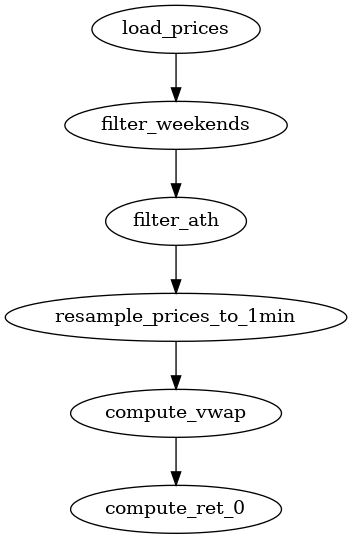

In [126]:
#print(dag)
cdataf.draw(dag)

In [127]:
# Align on a even second.
cdrt.align_on_even_second()
#
sleep_interval_in_secs = 1.0
num_iterations = 3
external_clock = rrt.get_replayed_current_time
get_current_time = cdrt.execute_every_2_seconds
#
execution_trace = cdrt.execute_with_real_time_loop(
    sleep_interval_in_secs,
    num_iterations,
    get_current_time,
    need_to_execute,
    workload,
)

initial_replayed_dt=2021-07-27 09:30:00-04:00
Using tz 'America/New_York'
now='2021-07-29 19:48:20.001413-04:00'


NameError: name 'self' is not defined